In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import datetime

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

# Weather Dataset

In [2]:
weather = pd.read_csv('../04_weekly_weather.csv')
weather.head()

,date,max_temp,max_temp1,max_temp2,location,mean_temp,mean_temp1,mean_temp2,min_temp,min_temp1,min_temp2,dew_point,dew_point1,dew_point2,precipitation,precipitation1,precipitation2,wind,wind1,wind2
0,2015-11-28,94.0,94.0,94.0,Mexico-Guerrero,84.0,84.0,84.0,73.0,75.0,74.0,75.0,78.0,77.0,1.22,0.00,0.00,4.0,4.0,4.0
1,2015-12-05,93.0,94.0,94.0,Mexico-Guerrero,82.0,84.0,84.0,72.0,73.0,75.0,74.0,75.0,78.0,0.00,1.22,0.00,4.0,4.0,4.0
2,2015-12-09,92.0,93.0,35.0,Mexico-Guerrero,82.0,82.0,29.0,72.0,72.0,23.0,74.0,74.0,24.0,0.00,0.00,30.99,4.0,4.0,6.0
3,2015-12-12,92.0,93.0,94.0,Mexico-Guerrero,82.0,82.0,84.0,72.0,72.0,73.0,74.0,74.0,75.0,0.00,0.00,1.22,4.0,4.0,4.0
4,2015-12-16,32.0,92.0,93.0,Mexico-Guerrero,28.0,82.0,82.0,23.0,72.0,72.0,23.0,74.0,74.0,6.35,0.00,0.00,7.0,4.0,4.0


In [3]:
# Convert our report_date columns to datetime datatype
weather['date'] = pd.to_datetime(weather['date'], format="%Y-%m-%d")

# create new year and month column from datetime
weather['year'] = pd.DatetimeIndex(weather['date']).year
weather['month'] = pd.DatetimeIndex(weather['date']).month

In [4]:
weather.shape

(112644, 22)

# 

# Zika Virus Dataset

In [5]:
zika = pd.read_csv('../zikavirus_dataset.csv')
zika.head()

,report_date,location,location_type,data_field,cases
0,2017-01-12,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,0.0
1,2017-01-12,Argentina-CABA,province,cumulative_confirmed_imported_cases,1.0
2,2017-01-12,Argentina-Cordoba,province,cumulative_confirmed_imported_cases,2.0
3,2017-01-12,Argentina-Entre_Rios,province,cumulative_confirmed_imported_cases,0.0
4,2017-01-12,Argentina-Santa_Fe,province,cumulative_confirmed_imported_cases,2.0


In [6]:
zika.shape

(242450, 5)

In [7]:
# filter out those rows which does not contain any data
zika = zika.dropna(how = 'all')
  
# Filter all rows for which the report_date is equal to 18437
zika.drop(zika[zika['report_date'] == '18437'].index, inplace = True)

# covert string to an float
zika['cases'] = zika['cases'].astype(float)

# Replace nan value with 0,
zika['cases'] = zika['cases'].fillna(0)

# covert float to an int
zika['cases'] = zika['cases'].astype(int)

# Convert our report_date columns to datetime datatype
zika['report_date'] = pd.to_datetime(zika['report_date'], format="%Y-%m-%d")

# create new year and month column from datetime
zika['year'] = pd.DatetimeIndex(zika['report_date']).year
zika['month'] = pd.DatetimeIndex(zika['report_date']).month

In [8]:
zika.head()

,report_date,location,location_type,data_field,cases,year,month
0,2017-01-12,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,0,2017.0,1.0
1,2017-01-12,Argentina-CABA,province,cumulative_confirmed_imported_cases,1,2017.0,1.0
2,2017-01-12,Argentina-Cordoba,province,cumulative_confirmed_imported_cases,2,2017.0,1.0
3,2017-01-12,Argentina-Entre_Rios,province,cumulative_confirmed_imported_cases,0,2017.0,1.0
4,2017-01-12,Argentina-Santa_Fe,province,cumulative_confirmed_imported_cases,2,2017.0,1.0


## 

## 1 Argentina
1. There are 14 province in argentina
2. 8 types of data fields


In [9]:
argentina_zika = zika[zika["location"].str.startswith("Argentina")]
argentina_zika.head()

,report_date,location,location_type,data_field,cases,year,month
0,2017-01-12,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,0,2017.0,1.0
1,2017-01-12,Argentina-CABA,province,cumulative_confirmed_imported_cases,1,2017.0,1.0
2,2017-01-12,Argentina-Cordoba,province,cumulative_confirmed_imported_cases,2,2017.0,1.0
3,2017-01-12,Argentina-Entre_Rios,province,cumulative_confirmed_imported_cases,0,2017.0,1.0
4,2017-01-12,Argentina-Santa_Fe,province,cumulative_confirmed_imported_cases,2,2017.0,1.0


In [10]:
# create new column country and state
state = []

# iterate location
for mystring in argentina_zika['location']:
    first_partitioned_string = mystring.rpartition('-')
    state_name = first_partitioned_string[2]
    state.append(state_name.strip())
      
argentina_zika.insert(1, "state",state, True)
argentina_zika = argentina_zika.drop(['location','location_type'],axis=1)
argentina_zika.head()

,report_date,state,data_field,cases,year,month
0,2017-01-12,Buenos_Aires,cumulative_confirmed_imported_cases,0,2017.0,1.0
1,2017-01-12,CABA,cumulative_confirmed_imported_cases,1,2017.0,1.0
2,2017-01-12,Cordoba,cumulative_confirmed_imported_cases,2,2017.0,1.0
3,2017-01-12,Entre_Rios,cumulative_confirmed_imported_cases,0,2017.0,1.0
4,2017-01-12,Santa_Fe,cumulative_confirmed_imported_cases,2,2017.0,1.0


### 1.1 Data fields

In [11]:
argentina_zika.data_field.unique()

array(['cumulative_confirmed_imported_cases',
       'cumulative_probable_imported_cases',
       'cumulative_confirmed_zika_pregnant',
       'cumulative_possible_zika_pregnant',
       'cumulative_congenital_syndrome_zika',
       'cumulative_confirmed_local_cases',
       'cumulative_probable_local_cases', 'cumulative_cases_under_study'],
      dtype=object)

1. cumulative_confirmed_local_cases - Local transmission cases of Zika virus infection since Week 1
2. cumulative_confirmed_imported_cases - Imported cases of Zika virus infection since Week 1
3. cumulative_probable_local_cases - Local transmission cases of Zika virus infection since Week 1 - Probable
4. cumulative_probable_imported_cases - Imported cases of Zika virus infection since Week 1 - Probable

Let's analyse confirmed local cases

In [12]:
argLocal = argentina_zika[argentina_zika['data_field'] == 'cumulative_confirmed_local_cases']
argLocal.head()

,report_date,state,data_field,cases,year,month
182,2016-04-02,Buenos_Aires,cumulative_confirmed_local_cases,0,2016.0,4.0
183,2016-04-02,CABA,cumulative_confirmed_local_cases,0,2016.0,4.0
184,2016-04-02,Cordoba,cumulative_confirmed_local_cases,1,2016.0,4.0
185,2016-04-02,Entre_Rios,cumulative_confirmed_local_cases,0,2016.0,4.0
186,2016-04-02,Santa_Fe,cumulative_confirmed_local_cases,0,2016.0,4.0


In [13]:
argentina_monthly = argLocal.groupby(['state','month','year']).cases.agg([sum])
argentina_monthly = argentina_monthly.reset_index()
argentina_monthly

,state,month,year,sum
0,Buenos_Aires,3.0,2016.0,0
1,Buenos_Aires,3.0,2017.0,0
2,Buenos_Aires,4.0,2016.0,0
3,Buenos_Aires,4.0,2017.0,0
4,Buenos_Aires,5.0,2016.0,0
...,...,...,...,...
259,Tucuman,6.0,2016.0,82
260,Tucuman,6.0,2017.0,0
261,Tucuman,7.0,2016.0,110
262,Tucuman,8.0,2016.0,92


### 1.2 Country wise cases

In [14]:
# Countries with zero case
total_cases = argLocal.groupby(['state']).cases.agg([sum])
total_cases.head()

,sum
state,
Buenos_Aires,0
CABA,0
Catamarca,0
Chaco,190
Chubut,0


In [15]:
# remove countries with zero case
total_cases = total_cases[total_cases['sum'] != 0]
total_cases.index

Index(['Chaco', 'Cordoba', 'Formosa', 'Salta', 'Tucuman'], dtype='object', name='state')

In [16]:
# Countries without zero case
total_cases

,sum
state,
Chaco,190
Cordoba,27
Formosa,61
Salta,147
Tucuman,413


### 1.3 Analyse the pattern of spreading virus - countries wise

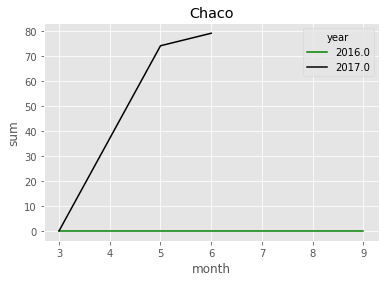

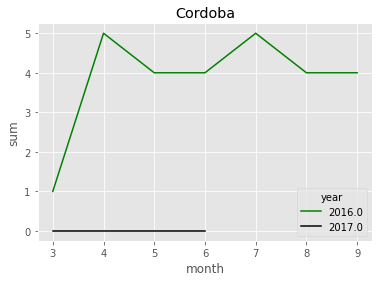

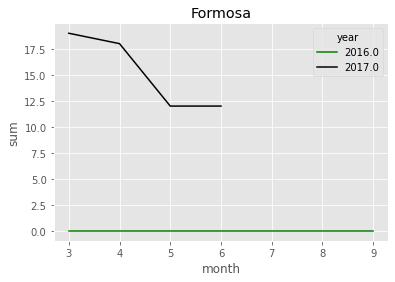

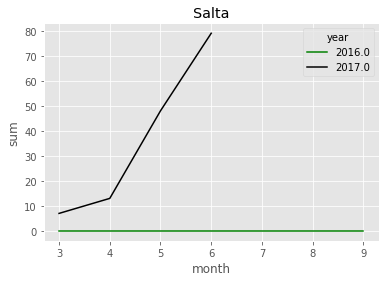

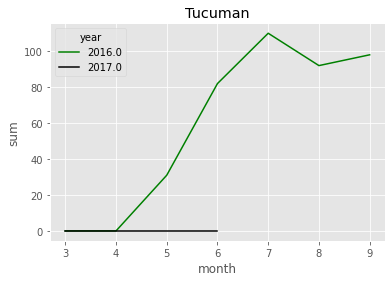

In [17]:
arg_state_lst = ['Chaco', 'Cordoba', 'Formosa', 'Salta', 'Tucuman']
for i in arg_state_lst:
    argdf = argentina_monthly[argentina_monthly['state'] == i ]
    sns.lineplot(x='month', y='sum', hue='year',data=argdf,palette=['green','black'])
    plt.title(i)
    plt.show()

### 1.4 Analyse the pattern of spreading virus in ARGENTINA

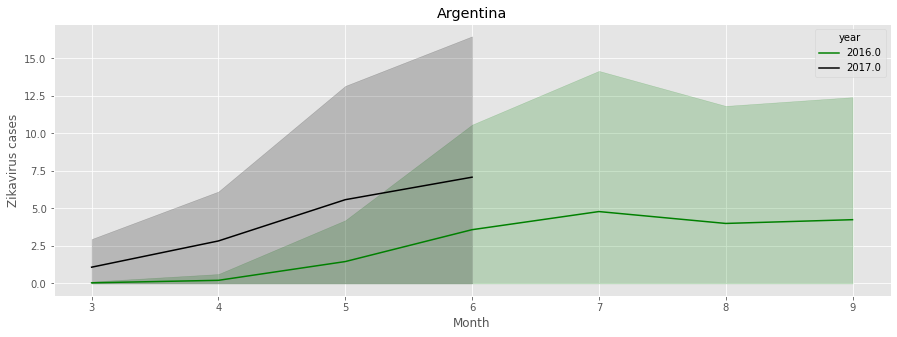

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month', y='sum', hue='year',data=argentina_monthly,palette=['green','black'])
plt.title('Argentina')
plt.xlabel('Month')
plt.ylabel('Zikavirus cases')
plt.show()

Let's analyse the confirmed cases of zika virus with three environmental factors such as max temperature, dew point, precipitation and wind. And also considering the incubation period 3–14 days.

### 1.5 Analysis of weather - Tucuman 413 cases

In [19]:
tucumna_zika = argLocal[argLocal['state'] == 'Tucuman']
tucumna_zika = tucumna_zika.sort_values(by=['report_date'])
tucumna_zika.head()

,report_date,state,data_field,cases,year,month
5544,2016-03-28,Tucuman,cumulative_confirmed_local_cases,0,2016.0,3.0
195,2016-04-02,Tucuman,cumulative_confirmed_local_cases,0,2016.0,4.0
452,2016-04-08,Tucuman,cumulative_confirmed_local_cases,0,2016.0,4.0
572,2016-04-16,Tucuman,cumulative_confirmed_local_cases,0,2016.0,4.0
692,2016-04-22,Tucuman,cumulative_confirmed_local_cases,0,2016.0,4.0


In [20]:
tucumna_zika = tucumna_zika.groupby(['report_date']).cases.agg([sum])
tucumna_zika = tucumna_zika.reset_index()
tucumna_zika

,report_date,sum
0,2016-03-28,0
1,2016-04-02,0
2,2016-04-08,0
3,2016-04-16,0
4,2016-04-22,0
5,2016-04-29,0
6,2016-05-07,0
7,2016-05-14,2
8,2016-05-22,11
9,2016-05-30,18


<AxesSubplot:xlabel='report_date', ylabel='sum'>

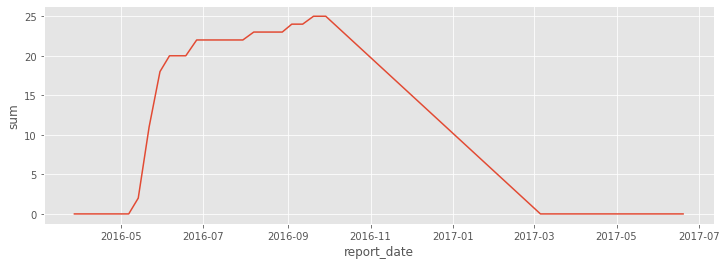

In [21]:
plt.figure(figsize=(12,4))
sns.lineplot(x='report_date',y='sum',data=tucumna_zika)

In [22]:
tucumna_weather = weather[weather['location'] == 'Argentina-Tucuman']

### Case 1
* Report date - 2016-04-22 = 0
* weather date - 2016-04-08 to 2016-04-22

<AxesSubplot:xlabel='date', ylabel='max_temp'>

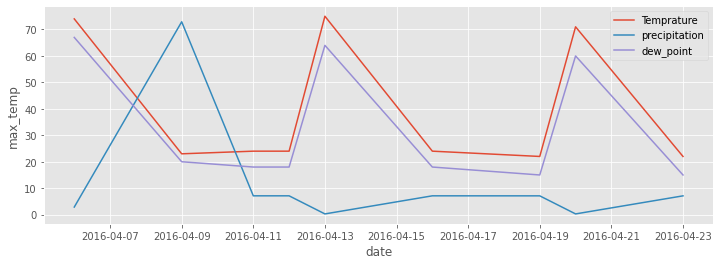

In [23]:
tucumna_case1 = tucumna_weather.loc[(tucumna_weather['date'] >= '2016-04-06') & (tucumna_weather['date'] <= '2016-04-23')]
plt.figure(figsize=(12,4))
sns.lineplot(x='date',y='max_temp',data=tucumna_case1,label='Temprature')
sns.lineplot(x='date',y='precipitation',data=tucumna_case1,label='precipitation')
sns.lineplot(x='date',y='dew_point',data=tucumna_case1,label='dew_point')

### Case 2
* Report date - 2016-05-07 = 0
* weather date - 2016-04-22 to 2016-05-07

In [24]:
tucumna_case2 = tucumna_weather.loc[(tucumna_weather['date'] >= '2016-04-20') & (tucumna_weather['date'] <= '2016-05-07')]

<AxesSubplot:xlabel='date', ylabel='max_temp'>

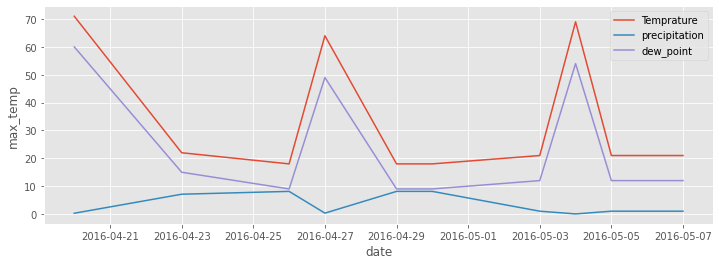

In [25]:
plt.figure(figsize=(12,4))
sns.lineplot(x='date',y='max_temp',data=tucumna_case2,label='Temprature')
sns.lineplot(x='date',y='precipitation',data=tucumna_case2,label='precipitation')
sns.lineplot(x='date',y='dew_point',data=tucumna_case2,label='dew_point')

### Case 3
* Report date -2016-05-14 = 2
* weather date - 2016-05-01 to 2016-05-14

In [26]:
tucumna_case3 = tucumna_weather.loc[(tucumna_weather['date'] >= '2016-04-30') & (tucumna_weather['date'] < '2016-05-15')]

<AxesSubplot:xlabel='date', ylabel='max_temp'>

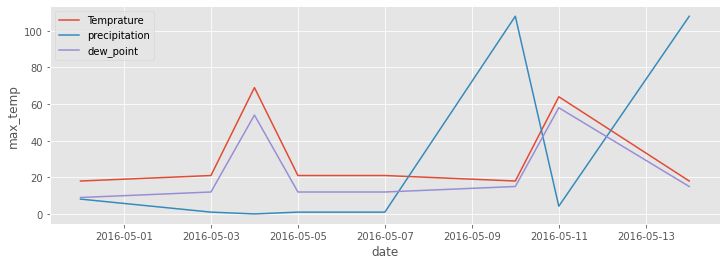

In [27]:
plt.figure(figsize=(12,4))
sns.lineplot(x='date',y='max_temp',data=tucumna_case3,label='Temprature')
sns.lineplot(x='date',y='precipitation',data=tucumna_case3,label='precipitation')
sns.lineplot(x='date',y='dew_point',data=tucumna_case3,label='dew_point')

### Case 4
* Report date - 2016-05-22	= 11
* weather date - 2016-05-08 to 2016-05-22	

In [28]:
tucumna_case4 = tucumna_weather.loc[(tucumna_weather['date'] >= '2016-05-08') & (tucumna_weather['date'] <= '2016-05-22')]

<AxesSubplot:xlabel='date', ylabel='max_temp'>

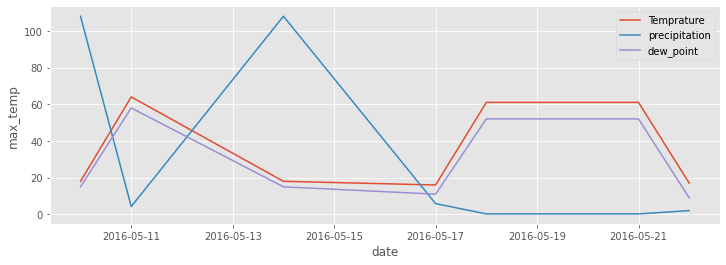

In [29]:
plt.figure(figsize=(12,4))
sns.lineplot(x='date',y='max_temp',data=tucumna_case4,label='Temprature')
sns.lineplot(x='date',y='precipitation',data=tucumna_case4,label='precipitation')
sns.lineplot(x='date',y='dew_point',data=tucumna_case4,label='dew_point')

## 1.5 Pattern of weather in Tucuman

<AxesSubplot:xlabel='date', ylabel='max_temp'>

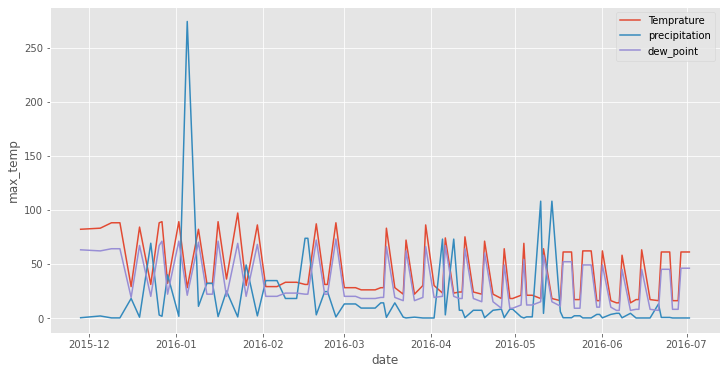

In [30]:
tucumna_weather = weather[weather['location'] == 'Argentina-Tucuman']
plt.figure(figsize=(12,6))
sns.lineplot(x='date',y='max_temp',data=tucumna_weather,label='Temprature')
sns.lineplot(x='date',y='precipitation',data=tucumna_weather,label='precipitation')
sns.lineplot(x='date',y='dew_point',data=tucumna_weather,label='dew_point')

<AxesSubplot:xlabel='date', ylabel='precipitation'>

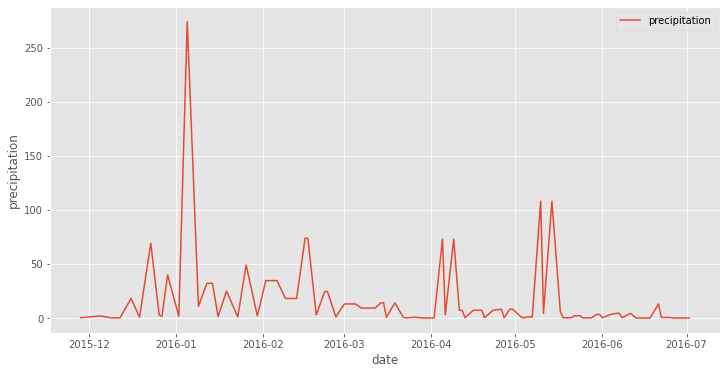

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date',y='precipitation',data=tucumna_weather,label='precipitation')

# 